In [1]:
from environments.gridworld import GridWorld, State
from lonr.local_no_regret import LocalNoRegret
import matplotlib.pyplot as plt

### Experiment Description

Gridworld with a starting point $S = (4,1)$ and ending point $O = (4,12)$. 

#### Grid World Used
![gridworld](gridworld.png)

#### Markov Decision Process

- *State Space*: Encoded as a matrix with states from $(1,1)$ to $(4,12)$ with $48$ states in total.
- *Actions*: north, east, west, south
- *Transitions*: For now, non-stochastic setting where the agent goes to the northern state with $100%$ probability if he takes the action _north_
- *Rewards*: If the action at any state takes the agent to the cliff, i.e $(4, 2)$ to $(4, 11)$, then the reward for that state, action pair is $-100$. Everything else if $-1$, which will prompt the agent to reach his destination as quickly as possible.
- *Discount Factor*: Have used 0.99 (in the paper they used 1.0), which says that we are as far sighted as possible.

#### LONR setting
- LONR-V, which is the synchronous version.
- Expected SARSA style Q-learning update Rule.
$Q_{t+1}(n, s, a) = \sum_{s^\prime} T(n, s, a, s^\prime)(R(n, s, a) + \mathbb{E}_{a^\prime, \pi}[Q_{t}(n, s^\prime, a^\prime)])$
- The policy update rule from the paper. 
    ![policy update](policy.png)

    

In [67]:
TIME_LIMIT, NUM_AGENTS, GAMMA = 15000, 1, 0.99
START_STATE = State(4, 1)
NORTH = 'N'

In [68]:
grid = GridWorld()
lonr = LocalNoRegret(time_limit=TIME_LIMIT, num_agents=NUM_AGENTS, state_space=grid.state_space,
                     actions=grid.actions, next_states=grid.next_states, transitions=grid.transitions,
                     rewards=grid.rewards, gamma=GAMMA)
lonr.lonr_v()

In [69]:
q_values = lonr.get_optimal_values_list(START_STATE, NORTH)
optimal_path = lonr.get_optimal_path()
policy_diffs = lonr.get_policies_diff_list()

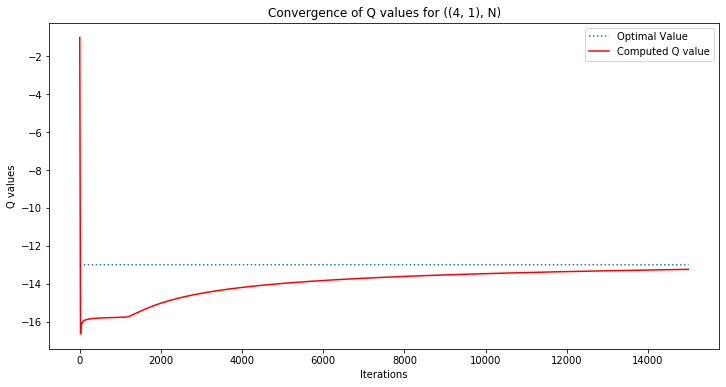

In [70]:
plot_q_values(q_values)

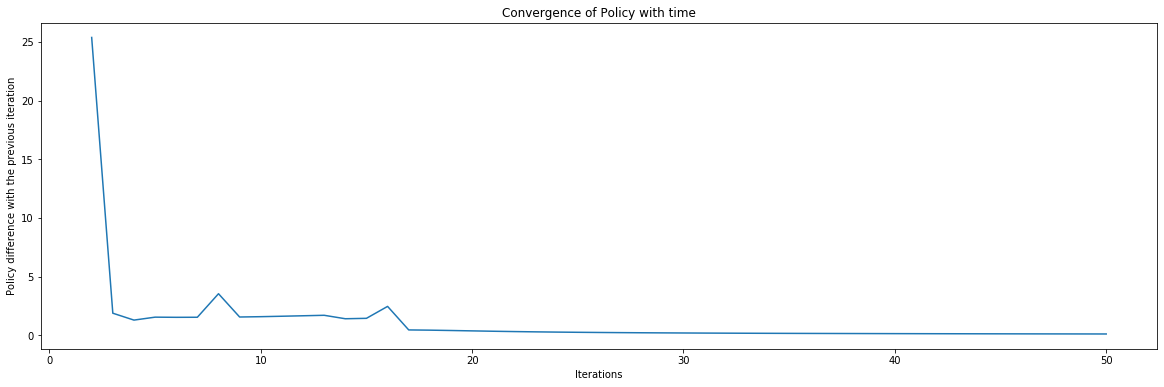

In [89]:
plot_policy_values(policy_diffs)

In [62]:
def plot_q_values(q_vals):
    plt.figure(figsize=(12,6))
    plt.plot([x for x in range(1, TIME_LIMIT + 1)], [-13.0 for _ in range(1, TIME_LIMIT + 1)], linestyle=':', label='Optimal Value')
    plt.plot([x for x in range(1, TIME_LIMIT + 1)], q_vals[1], label='Computed Q value', color='r')
    plt.title('Convergence of Q values for ({}, {})'.format(START_STATE, NORTH))
    plt.ylabel('Q values')
    plt.xlabel("Iterations")
    plt.legend()
    plt.show()

In [88]:
def plot_policy_values(pi_diffs):
    plt.figure(figsize=(20,6))
    plt.plot([x for x in range(2, 51)], pi_diffs[1][:49])
    plt.title('Convergence of Policy with time')
    plt.ylabel('Policy difference with the previous iteration')
    plt.xlabel("Iterations")
    plt.show()